In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import seaborn as sns 
import plotly.express as px
pd.set_option('display.max_columns',None)
df=pd.read_csv("./zomato.csv",encoding="ISO-8859-1")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [2]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [3]:
df.shape

(9551, 21)

In [4]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\anzar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
df2=pd.read_excel("./Country-Code.xlsx")
df2



,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [7]:
df=pd.merge(df,df2,on='Country Code',how='left')

In [8]:
df.shape

(9551, 22)

In [10]:
data=df[df['Country']=='India']

In [11]:
index=df.Country.value_counts().index

In [12]:
no=df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x26a8661af10>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

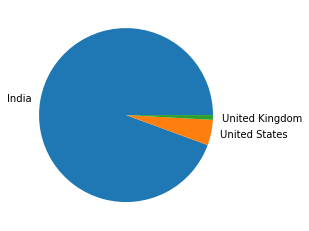

In [13]:
plt.pie(no[:3],labels=index[:3])

As we ca see from the above pie chart that india dominate the food market in zomato 

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [15]:
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

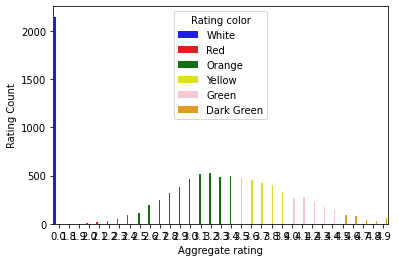

In [16]:
# displaying diff types of ratings 
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color',data=ratings,palette=['blue','red','green','yellow','pink','orange'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

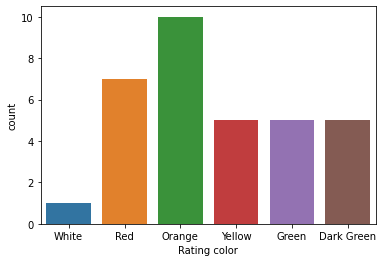

In [17]:
sns.countplot(x='Rating color',data=ratings)

Which country Give 0 rating 

In [18]:


df.groupby(['Aggregate rating','Country']).size().reset_index().sort_values(by='Aggregate rating',ascending=True).head(10)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
5,1.9,India,2
6,2.0,India,7
7,2.1,India,15
8,2.2,India,26
9,2.2,United States,1


Which Country Give GOOD Rating

<AxesSubplot:xlabel='Country'>

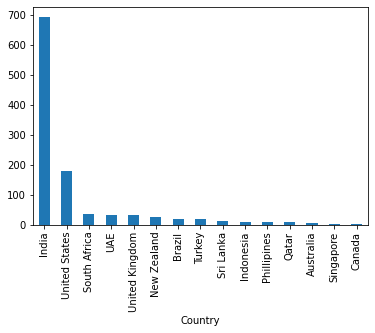

In [19]:
# good ratings 
df[df['Rating color']=='Green'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

Country with No Rating

<AxesSubplot:xlabel='Country'>

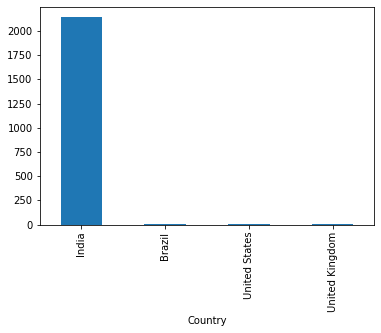

In [20]:
# no rating
df[df['Rating color']=='White'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

Country which Gave Poor Rating

<AxesSubplot:xlabel='Country'>

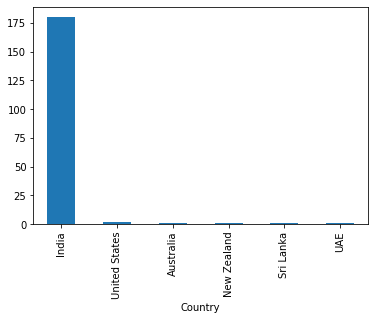

In [20]:
# poor  ratings
df[df['Rating color']=='Red'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

Country with Excellent Ratings

<AxesSubplot:xlabel='Country'>

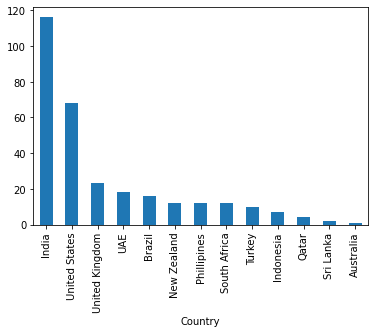

In [21]:
# excellent rating 
df[df['Rating color']=='Dark Green'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

Top 20 Cuisines 

<AxesSubplot:>

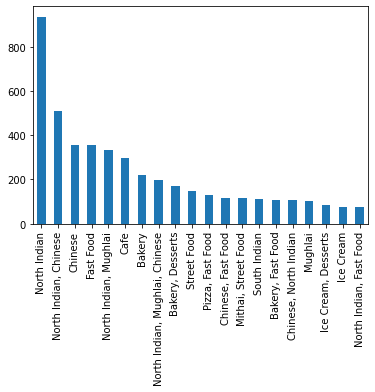

In [22]:

df.Cuisines.value_counts().head(20).plot(kind='bar')

As You Can Notice That India is Dominant in this dataset so i will do some analysis only on india after filtering the dataset  

In [23]:

# data=df[df['Country']=='India']
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India


In [24]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

Some cuisines that are popular in india 

<AxesSubplot:>

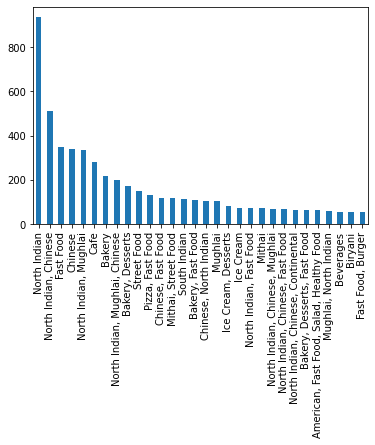

In [27]:
data['Cuisines'].value_counts().sort_values(ascending=False).head(30).plot(kind='bar')

In [28]:
data['Restaurant Name'].unique().shape

(6604,)

In [29]:
data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()


,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


In [30]:
costly=data[data['Average Cost for two']>3000].drop_duplicates()

The bar graph shows that New Delhi has many costly restraunts max Price is 8000 for two persons

In [31]:
fig=px.bar(costly,x='City',y='Average Cost for two')
fig.show()

In [32]:


cheap=data[data['Average Cost for two']<800].sort_values(by='Average Cost for two').drop_duplicates().tail(60)


New Delhi also has many cheap restraunts also 

In [33]:
figg=px.pie(cheap,values='Average Cost for two',names='City')
figg.show()

In [34]:
top_rated=data[data['Aggregate rating']>4.5]

In [35]:
low_rated=data[data['Aggregate rating']<3.4]

Top Rated restraunts city wise 

In [36]:
figure=px.bar(top_rated,x='City',y='Aggregate rating')
figure.show()

Low Rated restraunts city wise

In [37]:
figure=px.scatter(low_rated,x='City',y='Aggregate rating',color='Rating color')
figure.show()

City wise analysis how many City has Online delivery System 

In [38]:
data.groupby('City').agg('Has Online delivery').value_counts().sort_values(ascending=False).unstack().fillna(0).astype(int).sort_values(['No','Yes'],ascending=False)



Has Online delivery,No,Yes
City,,
New Delhi,3984,1489
Noida,716,364
Gurgaon,693,425
Faridabad,216,35
Amritsar,21,0
Bhubaneshwar,21,0
Guwahati,21,0
Lucknow,21,0
Agra,20,0


City wise analysis How many city has table booking feature 

In [39]:
a=data.groupby('City').agg('Has Table booking').value_counts().sort_values(ascending=False)

a.unstack().fillna(0).astype(int).sort_values(['No','Yes'],ascending=False).reset_index()








Has Table booking,City,No,Yes
0,New Delhi,4758,715
1,Noida,968,112
2,Gurgaon,914,204
3,Faridabad,236,15
4,Ghaziabad,22,3
5,Ahmedabad,21,0
6,Amritsar,21,0
7,Bhubaneshwar,21,0
8,Guwahati,21,0
9,Lucknow,21,0
